Note that this data was taken by the Labsters of whatever they call themselves now (Corina, Alicia, and Bryce)

In [175]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as sig

def f_lin(x, m, b):
    return m * x + b


In [11]:
raw_data = pd.read_csv('Lab12 Part1.csv')
raw_data = pd.DataFrame(raw_data).to_numpy()

time_raw = raw_data[:,0]
omega_raw = raw_data[:,1]
mV_raw = raw_data[:,2]

omega_interp = interp1d(time_raw, omega_raw, kind="linear")
mV_interp = interp1d(time_raw, mV_raw, kind="linear")


In [165]:
start_time = 10
stop_time = 80
step_size = 0.0025
time = np.arange(start_time, stop_time, step_size)

omega = omega_interp(time)
mV = mV_interp(time)


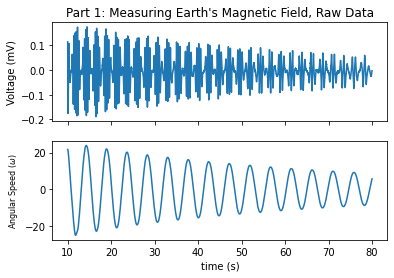

In [166]:
# Two subplots, the axes array is shared
# Choose the sensor for fitting.
f, axarr = plt.subplots(2, sharex=True)
# plt.xlim(start_time, stop_time)
axarr[0].plot(time, mV)
axarr[0].set_title('Part 1: Measuring Earth\'s Magnetic Field, Raw Data')
axarr[0].set_ylabel('Voltage (mV)', fontsize=10)
axarr[1].plot(time, omega)
axarr[1].set_ylabel(r'Angular Speed ($\omega$)', fontsize=8)
axarr[1].set_xlabel('time (s)')
plt.show()


In [167]:
n = 120

# How many neighboring points to compare to for min/max criteria
max_indices = sig.find_peaks(mV, distance=n)[0]
min_indices = sig.find_peaks(-1*mV, distance=n)[0]

mV_max = mV[max_indices]
omega_max = omega[max_indices]
time_max = time[max_indices]

mV_min = mV[min_indices]
omega_min = omega[min_indices]
time_min = time[min_indices]


In [177]:
mV_extrema = np.concatenate((mV_max, mV_min))
omega_extrema = np.concatenate((omega_max, omega_min))

mV_extrema = np.abs(mV_extrema)
omega_extrema = np.abs(omega_extrema)

# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, omega_extrema, mV_extrema)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))

mV_pred = f_lin(omega_extrema, m, b)

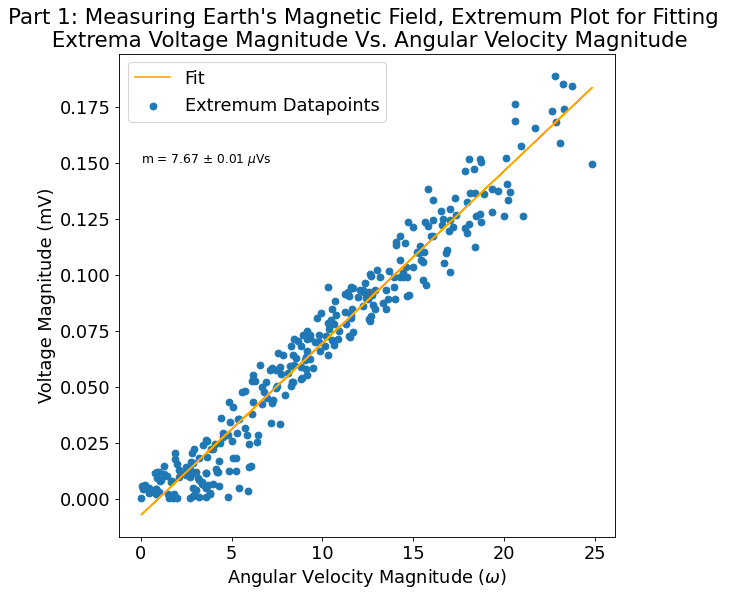

In [238]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.title('Part 1: Measuring Earth\'s Magnetic Field, Extremum Plot for Fitting \n Extrema Voltage Magnitude Vs. Angular Velocity Magnitude')
plt.plot(omega_extrema, mV_pred, color='orange', label='Fit')
plt.scatter(omega_extrema, mV_extrema, label='Extremum Datapoints')
plt.xlabel(r"Angular Velocity Magnitude ($\omega$)")
plt.ylabel("Voltage Magnitude (mV)")
plt.text(0,0.15, r'm = 7.67 ± 0.01 $\mu$Vs', fontsize=11)
plt.legend()

plt.show()


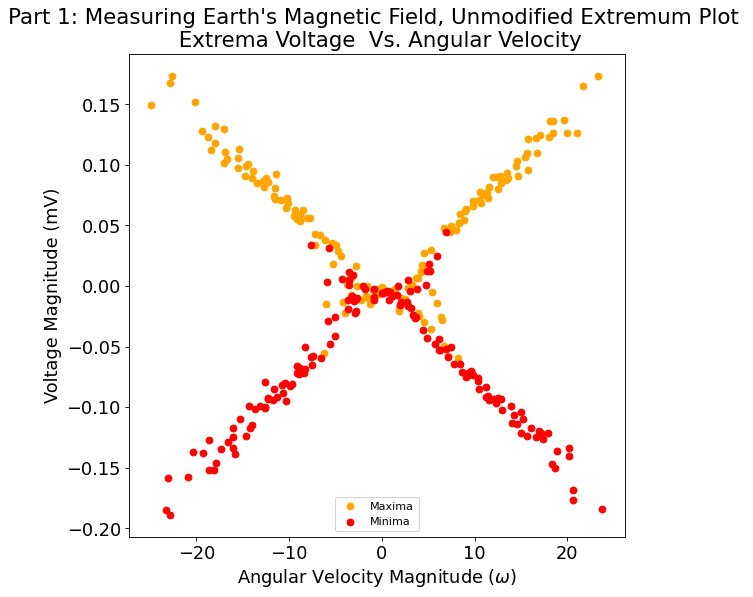

In [231]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.scatter(omega_max, mV_max, color='orange', label='Maxima')
plt.scatter(omega_min, mV_min, color='red', label='Minima')
plt.title("Part 1: Measuring Earth\'s Magnetic Field, Unmodified Extremum Plot \n Extrema Voltage  Vs. Angular Velocity")
plt.xlabel(r"Angular Velocity Magnitude ($\omega$)")
plt.ylabel("Voltage Magnitude (mV)")
plt.legend(prop={'size': 10}, loc='lower center')
# plt.xlim(3.9, 4.1)
plt.show()



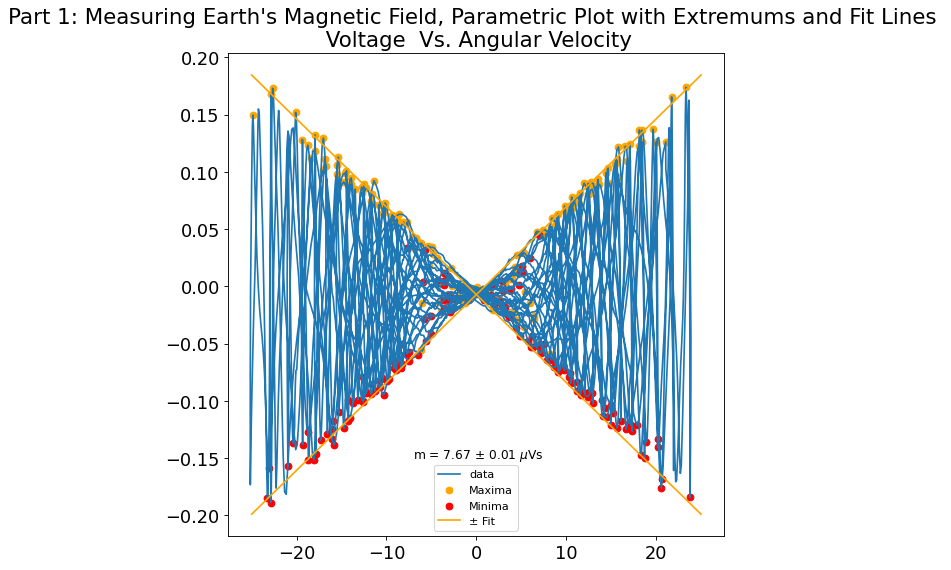

In [242]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.plot(omega, mV, label='data')
plt.scatter(omega_max, mV_max, color='orange', label='Maxima')
plt.scatter(omega_min, mV_min, color='red', label='Minima')
plt.title("Part 1: Measuring Earth\'s Magnetic Field, Parametric Plot with Extremums and Fit Lines \n Voltage  Vs. Angular Velocity")
plt.plot(np.linspace(-25, 25), f_lin(np.linspace(-25, 25), m, b), color='orange', label='± Fit')
plt.plot(np.linspace(-25, 25), f_lin(np.linspace(-25, 25), -m, b), color='orange')
plt.legend(prop={'size': 10}, loc='lower center')
plt.text(-7,-0.15, r'm = 7.67 ± 0.01 $\mu$Vs', fontsize=11)

plt.show()

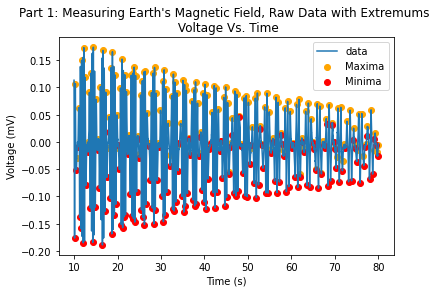

In [213]:
plt.plot(time, mV, label='data')
plt.scatter(time_max, mV_max, color='orange', label='Maxima')
plt.scatter(time_min, mV_min, color='red', label='Minima')
plt.title('Part 1: Measuring Earth\'s Magnetic Field, Raw Data with Extremums \n Voltage Vs. Time')
plt.ylabel('Voltage (mV)', fontsize=10)
plt.xlabel(r"Time (s)")
plt.legend(prop={'size': 10})

plt.show()

In [182]:
m

0.007673132649418675

In [185]:
dm

9.917696064707621e-05